### Student Activity: Portfolio Planner Part I

This program is part 1 of a two-part student activity and begins the following:

`PART 1: Portfolio Optimization via Risk Evaluation`

Reads in the CSV datasets of 10 stocks, calculates the volatility of each stock, drops the top-five highly volatile stocks, sets allocations for the remaining stocks based on risk/volatility, and calculates the returns of a hypothetical `$10,000` investment for the constructed portfolio.

`PART 2: Portfolio Optimization via Correlation and Return-to-Risk (Sharpe Ratio) Evaluations`

To be continued in the second part!


In [24]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

### Read CSVs as DataFrames 

In [25]:
# Set the file paths
bk_data = Path(r"C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\08-Stu_Portfolio_Planner\Resources\bk_data.csv")
fang_data = Path(r"C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\08-Stu_Portfolio_Planner\Resources\fang_data.csv")
jnj_data = Path(r"C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\08-Stu_Portfolio_Planner\Resources\jnj_data.csv")
luv_data = Path(r"C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\08-Stu_Portfolio_Planner\Resources\luv_data.csv")
mu_data = Path(r"C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\08-Stu_Portfolio_Planner\Resources\mu_data.csv")
nke_data = Path(r"C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\08-Stu_Portfolio_Planner\Resources\nke_data.csv")
sbux_data = Path(r"C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\08-Stu_Portfolio_Planner\Resources\sbux_data.csv")
t_data = Path(r"C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\08-Stu_Portfolio_Planner\Resources\t_data.csv")
wdc_data = Path(r"C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\08-Stu_Portfolio_Planner\Resources\wdc_data.csv")
wrk_data = Path(r"C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\08-Stu_Portfolio_Planner\Resources\wrk_data.csv")


# Read the CSVs and set the `date` column as a datetime index to the DataFrame
bk_df = pd.read_csv(bk_data, index_col="date", infer_datetime_format=True, parse_dates=True)
fang_df = pd.read_csv(fang_data, index_col="date", infer_datetime_format=True, parse_dates=True)
jnj_df = pd.read_csv(jnj_data, index_col="date", infer_datetime_format=True, parse_dates=True)
luv_df = pd.read_csv(luv_data, index_col="date", infer_datetime_format=True, parse_dates=True)
mu_df = pd.read_csv(mu_data, index_col="date", infer_datetime_format=True, parse_dates=True)
nke_df = pd.read_csv(nke_data, index_col="date", infer_datetime_format=True, parse_dates=True)
sbux_df = pd.read_csv(sbux_data, index_col="date", infer_datetime_format=True, parse_dates=True)
t_df = pd.read_csv(t_data, index_col="date", infer_datetime_format=True, parse_dates=True)
wdc_df = pd.read_csv(wdc_data, index_col="date", infer_datetime_format=True, parse_dates=True)
wrk_df = pd.read_csv(wrk_data, index_col="date", infer_datetime_format=True, parse_dates=True)

# Display a few rows
wrk_df.head()

,close
date,
2019-05-20,35.15
2019-05-17,36.66
2019-05-16,37.42
2019-05-15,37.44
2019-05-14,37.19


### Combine DataFrames, Sort Index, and Rename Columns

In [26]:
# Create a new pivot table where the columns are the closing prices for each ticker. Sort datetime index in ascending order (past to present)
# Set column names. Display a few rows
combined_df = pd.concat([bk_df, fang_df, luv_df, mu_df, nke_df, sbux_df, t_df, wdc_df, wrk_df], axis='columns', join='inner')
combined_df.columns = ['BK', 'FANG', 'LUV', 'MU', 'NKE', 'SBUX', 'T', 'WDC', 'WRK']
combined_df.sort_index(inplace=True)
combined_df

,BK,FANG,LUV,MU,NKE,SBUX,T,WDC,WRK
date,,,,,,,,,
2015-06-24,43.29,77.955,34.35,24.06,53.110,53.710,35.78,87.73,58.5699
2015-06-25,42.85,76.390,34.49,24.02,52.610,54.070,36.18,85.95,57.2022
2015-06-26,42.98,75.250,34.32,19.66,54.855,54.620,36.12,84.45,57.2022
2015-06-29,41.79,75.160,33.18,18.73,53.835,53.550,35.77,81.96,56.1857
2015-06-30,41.97,75.380,33.09,18.84,54.010,53.615,35.52,78.42,56.2781
...,...,...,...,...,...,...,...,...,...
2019-05-14,47.01,109.110,51.65,38.51,83.670,77.060,31.09,44.63,37.1900
2019-05-15,46.51,109.060,52.01,38.41,84.010,77.760,31.25,45.49,37.4400
2019-05-16,46.54,110.630,52.59,37.31,84.280,78.900,31.62,45.09,37.4200


### Calculate Daily Returns

In [27]:
# Use the `pct_change` function to calculate daily returns
daily_returns = combined_df.pct_change()
daily_returns

,BK,FANG,LUV,MU,NKE,SBUX,T,WDC,WRK
date,,,,,,,,,
2015-06-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-25,-0.010164,-0.020076,0.004076,-0.001663,-0.009414,0.006703,0.011179,-0.020290,-0.023352
2015-06-26,0.003034,-0.014923,-0.004929,-0.181515,0.042672,0.010172,-0.001658,-0.017452,0.000000
2015-06-29,-0.027687,-0.001196,-0.033217,-0.047304,-0.018594,-0.019590,-0.009690,-0.029485,-0.017770
2015-06-30,0.004307,0.002927,-0.002712,0.005873,0.003251,0.001214,-0.006989,-0.043192,0.001645
...,...,...,...,...,...,...,...,...,...
2019-05-14,-0.002969,0.017817,0.011951,0.030230,0.013813,0.004956,0.020348,0.038148,0.029623
2019-05-15,-0.010636,-0.000458,0.006970,-0.002597,0.004064,0.009084,0.005146,0.019270,0.006722
2019-05-16,0.000645,0.014396,0.011152,-0.028638,0.003214,0.014660,0.011840,-0.008793,-0.000534


### Evaluate Riskiness of Stocks

In [38]:
# Use the `std` function and multiply by the square root of the number of trading days in a year to get annualized volatility
annualised_volatility = daily_returns.std()*np.sqrt(252)
annualised_volatility.sort_values()

T       0.187579
SBUX    0.206805
BK      0.224967
NKE     0.246045
LUV     0.280021
WRK     0.303601
FANG    0.370840
WDC     0.415605
MU      0.479955
dtype: float64

### Drop High Volatility Stocks

In [44]:
# Drop the five stocks with the highest volatility in daily returns
remove_high_volatility_df = daily_returns.drop(columns=['WRK', 'FANG', 'WDC', 'MU'])
remove_high_volatility_df.head()

,BK,LUV,NKE,SBUX,T
date,,,,,
2015-06-24,NaN,NaN,NaN,NaN,NaN
2015-06-25,-0.010164,0.004076,-0.009414,0.006703,0.011179
2015-06-26,0.003034,-0.004929,0.042672,0.010172,-0.001658
2015-06-29,-0.027687,-0.033217,-0.018594,-0.019590,-0.009690
2015-06-30,0.004307,-0.002712,0.003251,0.001214,-0.006989


### Set Portfolio Allocations/Weights and Calculate Portfolio Daily Returns

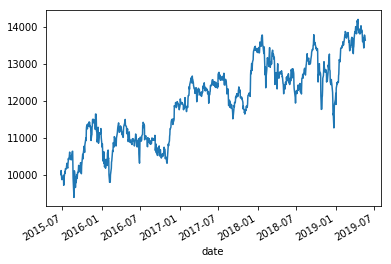

In [46]:
# Set weights for corresponding risk profile of stocks, use the `dot` function to multiply each weight by the corresponding stock daily return
# BK, LUV, NKE, SBUX, T
weights = [0.19, 0.21, 0.22, 0.24, 0.28]

portfolio_returns = remove_high_volatility_df.dot(weights)

# Use the `cumprod` function to calculate cumulative returns
cum_return = (1 + portfolio_returns).cumprod()

cum_profit = 10000 * cum_return

# Plot the returns of the portfolio in terms of money
cum_profit.plot()

### Calculate Cumulative Returns

### Plot Return of Portfolio Starting with Initial Investment of `$10,000`